In [2]:
import os

if 'COLAB_GPU' in os.environ:
  print("GPU IS enabled")
else:
  print("GPU IS not enabled")

GPU IS enabled


**INSTALL YOLO-8 Model**

In [3]:
!pip install ultralytics==8.0.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.9 MB/s eta 0:00:00


**Check If YOLO-8 has been installed properly or not**

In [4]:
import ultralytics

ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


**Import Dataset from Roboflow**

In [5]:
%pwd

'/content'

In [6]:
!mkdir FaceEmotionSystem

In [7]:
!ls

FaceEmotionSystem


In [8]:
%pwd

'/content'

In [9]:
os.chdir("/content/FaceEmotionSystem")

In [10]:
%pwd

'/content/FaceEmotionSystem'

In [11]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JglmiERxBBYXFkqbPHzb")
project = rf.workspace("artificial-intelligence-wpl0h").project("face_emotion-esisv-fopab-ihbip-t2ldb")
version = project.version(1)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.2 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Face_Emotion-1 in yolov8:: 100%|██████████| 3908/3908 [00:01<00:00, 1969.82it/s]


**Training The YOLOv8 Over A Custom Dataset**

In [12]:
os.chdir("/content/FaceEmotionSystem/Face_Emotion-1")

In [13]:
%pwd

'/content/FaceEmotionSystem/Face_Emotion-1'

In [15]:
!yolo task=detect \
      mode=train \
      model=yolov8n.pt \
      data="/content/FaceEmotionSystem/Face_Emotion-1/data.yaml" \
      epochs=100 \
      imgsz=680 \
      batch=16 \
      augment=True



Streaming output truncated to the last 5000 lines.
               disgust        402         29      0.499      0.862      0.673      0.597
                  fear        402        312      0.823      0.806      0.885      0.684
                 happy        402        380      0.845      0.934      0.943      0.738
               neutral        402        432      0.766      0.846      0.855      0.631
                   sad        402        336      0.736      0.756      0.804      0.618
              surprise        402         46       0.77      0.872       0.91      0.781

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
  0% 0/84 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/ultralytics/yolo/engine/trainer.py:299: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(self.amp):
     75/100      5.34G     0.6601     0.7017      1.001        12

**Display Some Of The Content We Obtained**

In [17]:
!ls '/content/FaceEmotionSystem/Face_Emotion-1/runs/detect/train2/weights'

best.pt  last.pt


In [18]:
!ls '/content/FaceEmotionSystem/Face_Emotion-1/runs/detect/train2'

args.yaml					    F1_curve.png  R_curve.png  weights
confusion_matrix.png				    P_curve.png   results.csv
events.out.tfevents.1736776206.165833ca0ff2.1870.0  PR_curve.png  results.png


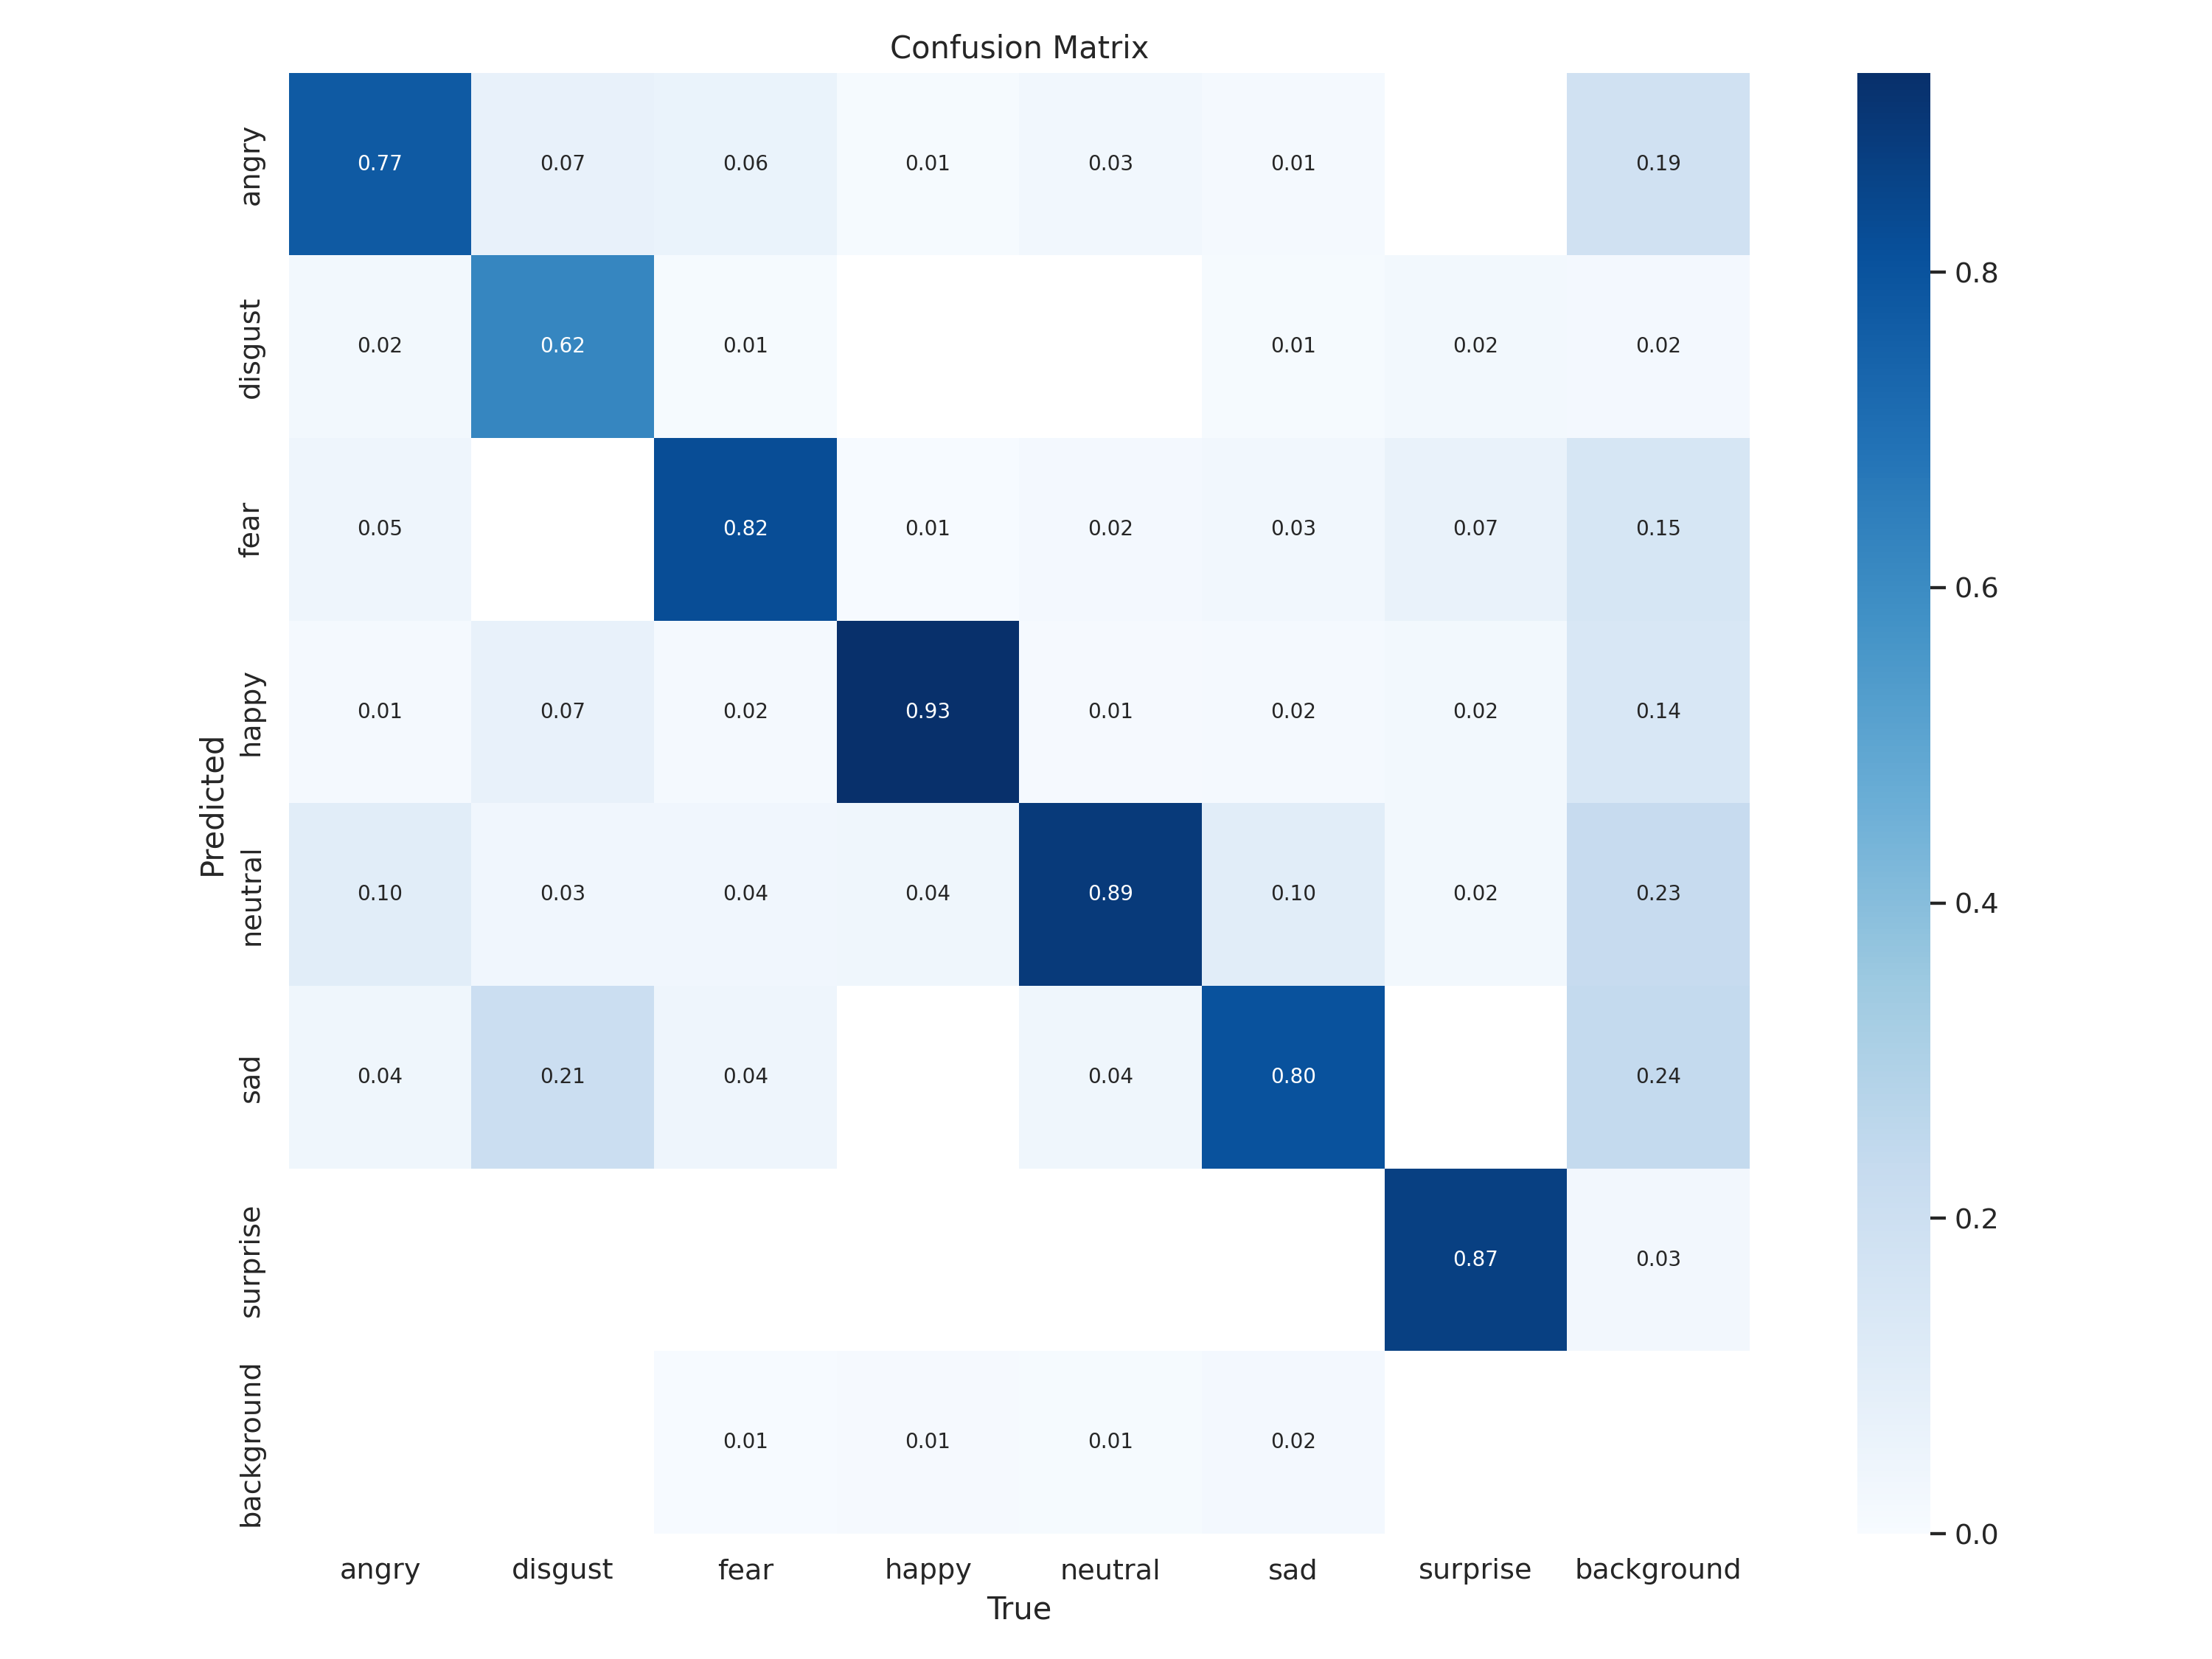

In [19]:
resultData="/content/FaceEmotionSystem/Face_Emotion-1/runs/detect/train2/"

from IPython.display import Image, display

Image(filename = f'{resultData}confusion_matrix.png')

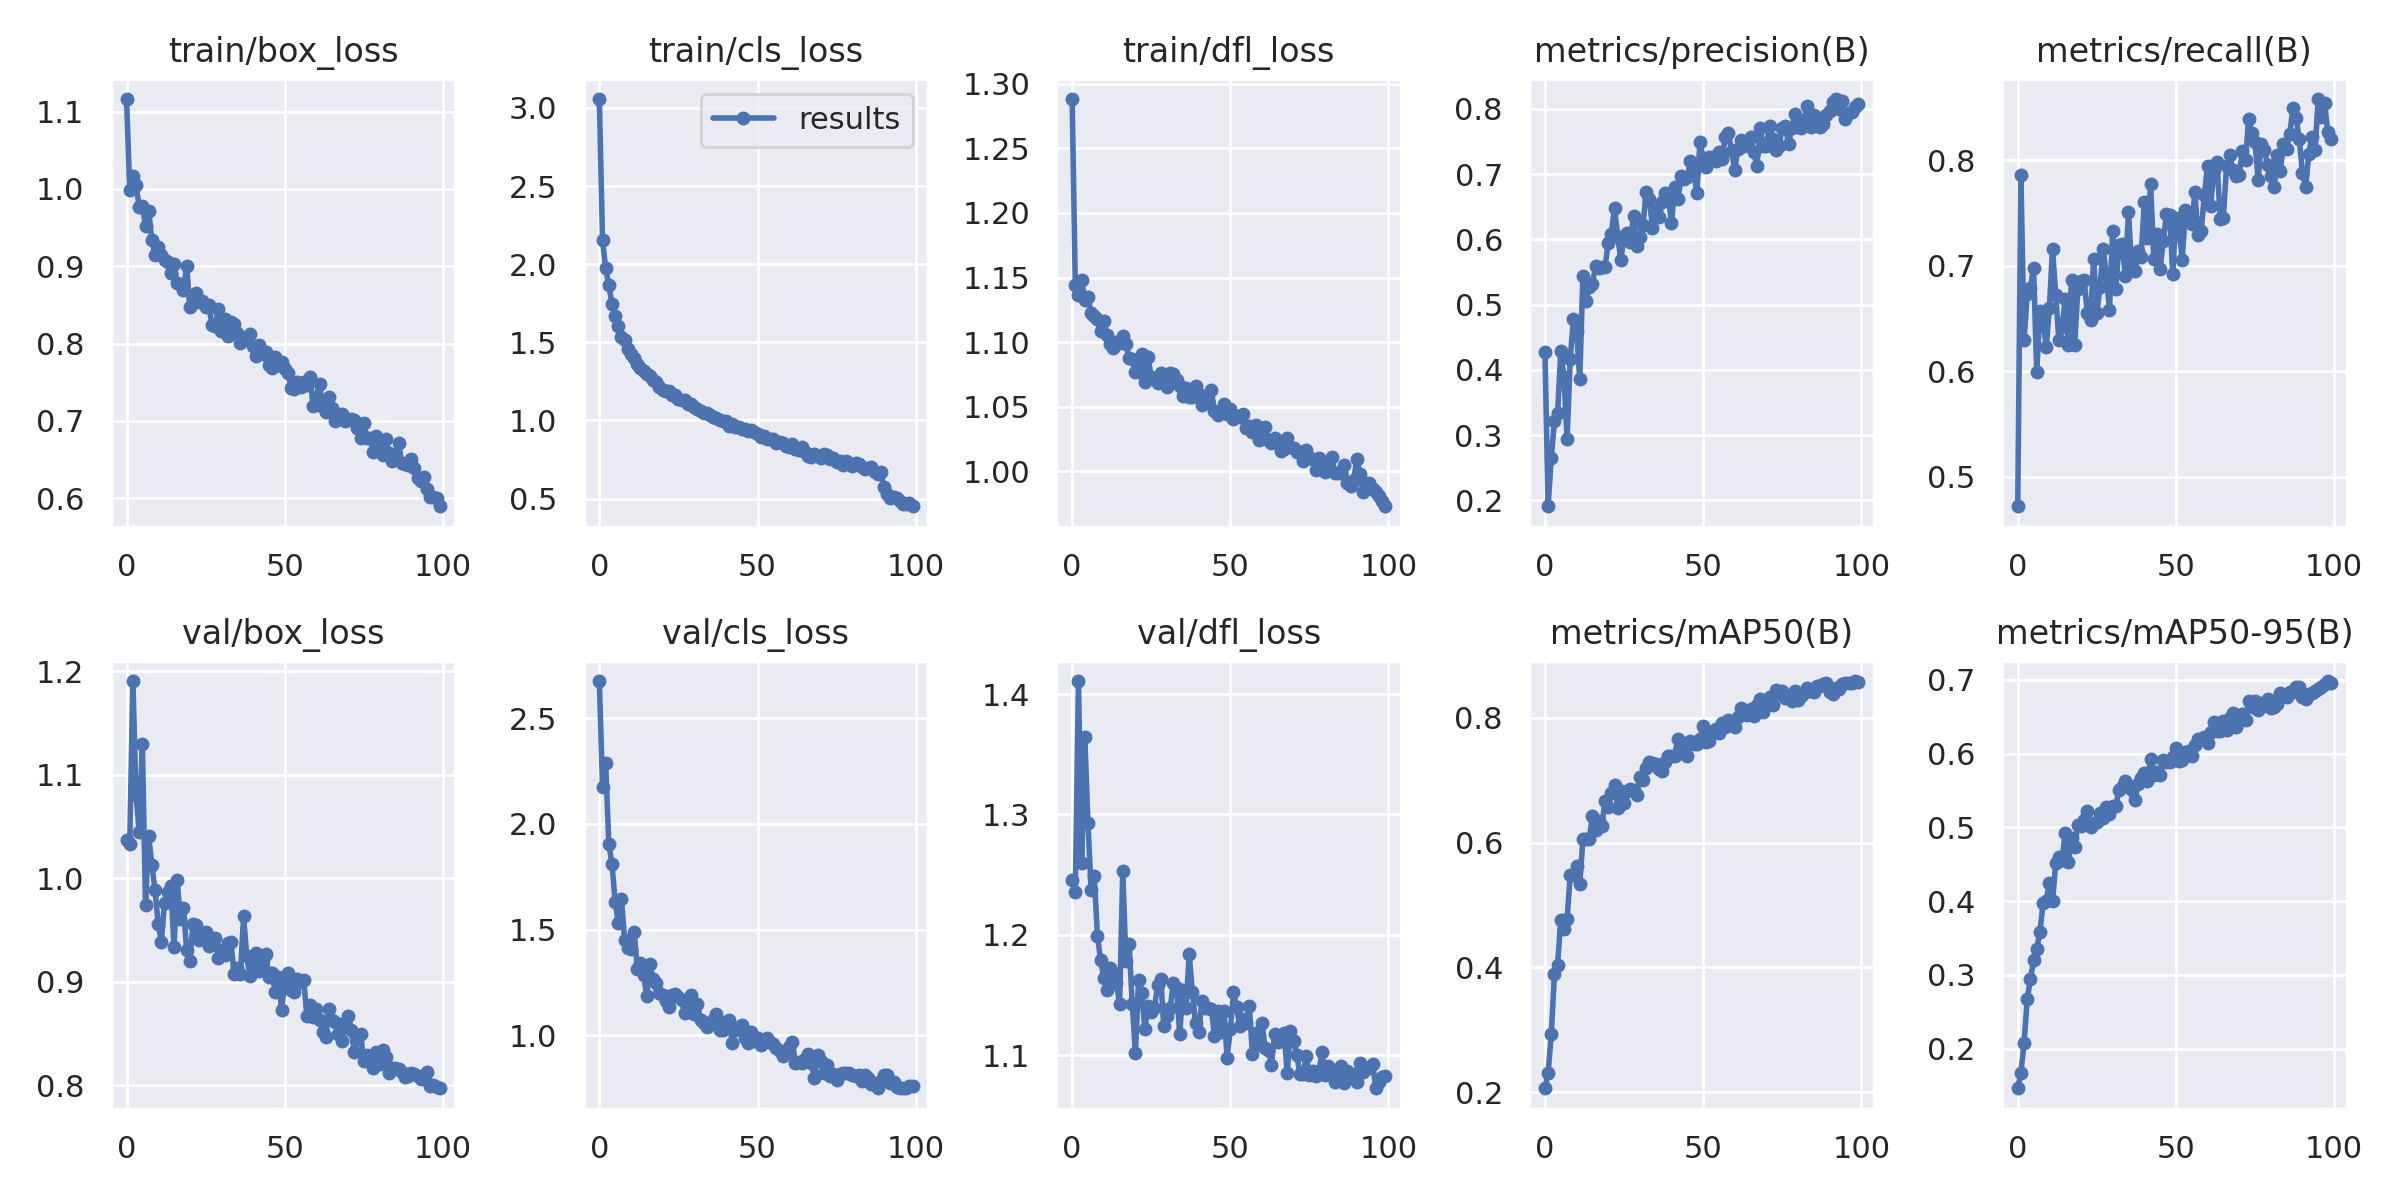

In [20]:
Image(filename = f'{resultData}results.png')

In [21]:
import pandas as pd

df=pd.read_csv(f'{resultData}results.csv')

print(df.head(5))

                  epoch        train/box_loss        train/cls_loss  \
0                     0               1.11640                3.0572   
1                     1               0.99930                2.1546   
2                     2               1.01670                1.9736   
3                     3               1.00580                1.8651   
4                     4               0.97684                1.7445   

         train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
0                1.2881               0.42816  ...                2.6759   
1                1.1439               0.19114  ...                2.1749   
2                1.1363               0.26579  ...                2.2872   
3                1.1483               0.32188  ...                1.9052   
4                1.1324               0.33373  ...                1.8115   

           val/dfl_loss                lr/pg0                lr/pg1  \
0                1.2458              0.070357

In [22]:
import pandas as pd

df=pd.read_csv(f'{resultData}results.csv')

print(df.tail(1))

                   epoch        train/box_loss        train/cls_loss  \
99                    99               0.58951               0.45121   

          train/dfl_loss  metrics/precision(B)  ...          val/cls_loss  \
99               0.97305               0.80771  ...               0.75922   

            val/dfl_loss                lr/pg0                lr/pg1  \
99                1.0826              0.000298              0.000298   

                  lr/pg2  
99              0.000298  

[1 rows x 14 columns]


# **Test your model on any arbitary video containing emotions**

In [23]:
%pwd

'/content/FaceEmotionSystem/Face_Emotion-1'

In [24]:
os.chdir("/content")

In [25]:
%pwd

'/content'

In [26]:
!mkdir ManualTestingData

In [27]:
os.chdir("/content/ManualTestingData")

In [28]:
%pwd

'/content/ManualTestingData'

In [29]:
!pip install yt-dlp

from yt_dlp import YoutubeDL

# YouTube video URL
youtube_url = "https://www.youtube.com/watch?v=7W2Ee4CrVEY"

# Output path for the downloaded video
output_path = "/content/ManualTestingData/InputVideo.mp4"

# yt-dlp options
ydl_opts = {
    'format': 'best',  # Download the best quality available (video + audio)
    'outtmpl': output_path,  # Save the video with the specified path and filename
    'progress_hooks': [lambda d: print(f"Status: {d['status']}, Filename: {d.get('filename', 'N/A')}")],
}

# Download the video
try:
    with YoutubeDL(ydl_opts) as ydl:
        ydl.download([youtube_url])
    print(f"Video successfully downloaded to: {output_path}")
except Exception as e:
    print(f"An error occurred: {e}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.1/172.1 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.1 MB/s eta 0:00:00
[youtube] Extracting URL: https://www.youtube.com/watch?v=7W2Ee4CrVEY
[youtube] 7W2Ee4CrVEY: Downloading webpage
[youtube] 7W2Ee4CrVEY: Downloading ios player API JSON
[youtube] 7W2Ee4CrVEY: Downloading tv player API JSON
[youtube] 7W2Ee4CrVEY: Downloading player 3ede36f2
[youtube] 7W2Ee4CrVEY: Downloading m3u8 information
[info] 7W2Ee4CrVEY: Downloading 1 format(s): 18
[download] Destination: /content/ManualTestingData/InputVideo.mp4
[download]   0.0% of    2.39MiB at  731.86KiB/s ETA 00:03Status: downloading, Filename: /content/ManualTestingData/InputVideo.mp4
[download]   0.1% of    2.39MiB at  714.90KiB/s ETA 00:03Status: downloading, Filename: /content/ManualTestingData/InputVideo.mp4
[download]   0.3% of    2.39MiB at    1.17MiB/s ETA 00:02Status: downloading, Filename: /content/ManualTestingData/InputVideo.mp4
[download]  

In [31]:
weightsPath="/content/FaceEmotionSystem/Face_Emotion-1/runs/detect/train2/weights"

!yolo task=detect mode=predict model={weightsPath}/best.pt  source="/content/ManualTestingData/InputVideo.mp4" save=True conf=0.5


/usr/local/lib/python3.10/dist-packages/ultralytics/nn/tasks.py:332: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(file, map_location='cpu')  # load
2025-0

In [32]:
from google.colab import files

files.download('/content/ManualTestingData/runs/detect/predict/InputVideo.mp4')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>